In [157]:
import pandas as pd
df = pd.read_csv("iphone_purchase_list.csv")

In [158]:
df['Purchase Iphone'].value_counts()

0    257
1    143
Name: Purchase Iphone, dtype: int64

In [159]:
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [160]:
df.shape

(400, 4)

In [161]:
df['Salary'].value_counts()

72000     12
80000     11
79000     10
75000      9
71000      9
          ..
123000     1
37000      1
115000     1
148000     1
139000     1
Name: Salary, Length: 117, dtype: int64

In [162]:
df.isnull().sum()
    

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

In [163]:
df['Salary'].value_counts()

72000     12
80000     11
79000     10
75000      9
71000      9
          ..
123000     1
37000      1
115000     1
148000     1
139000     1
Name: Salary, Length: 117, dtype: int64

In [164]:
df['Purchase Iphone']

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchase Iphone, Length: 400, dtype: int64

In [165]:
df['Purchase Iphone'].value_counts()

0    257
1    143
Name: Purchase Iphone, dtype: int64

In [166]:
iphone11=df.loc[(df['Purchase Iphone']==1) & (df['Salary']<50000)]
iphone11=pd.DataFrame(iphone11)
iphone11['Purchase Iphone']='iphone11'
iphone11.shape

(43, 4)

In [167]:
iphone12=df.loc[(df['Purchase Iphone']==1)&(df['Salary']>50000) & (df['Salary']<80000)]
iphone12=pd.DataFrame(iphone12)
iphone12['Purchase Iphone']='iphone12'
iphone12.shape

(15, 4)

In [168]:
iphone13=df.loc[(df['Purchase Iphone']==1)&(df['Salary']>80000) & (df['Salary']<100000)]
iphone13=pd.DataFrame(iphone13)
iphone13['Purchase Iphone']='iphone13'
iphone13.shape

(20, 4)

In [14]:
iphone13max=df.loc[(df['Purchase Iphone']==1)&(df['Salary']>100000)]
iphone13max=pd.DataFrame(iphone13max)
iphone13max['Purchase Iphone']='iphone13max'
iphone13max.shape

(62, 4)

In [15]:
noiphone=df.loc[(df['Purchase Iphone']==0)]
noiphone.shape

(257, 4)

In [16]:
iphone=pd.concat([iphone11,iphone12,iphone13,iphone13max,noiphone],axis=0)

In [17]:
iphone

,Gender,Age,Salary,Purchase Iphone
16,Male,47,25000,iphone11
17,Male,45,26000,iphone11
18,Male,46,28000,iphone11
19,Female,48,29000,iphone11
20,Male,45,22000,iphone11
...,...,...,...,...
377,Female,42,53000,0
380,Male,42,64000,0
387,Male,39,71000,0
394,Female,39,59000,0


In [146]:
iphone.to_csv('raymon.csv')

In [147]:
df1=pd.read_csv('raymon.csv')
df1

,Unnamed: 0,Gender,Age,Salary,Purchase Iphone
0,16,Male,47,25000,iphone11
1,17,Male,45,26000,iphone11
2,18,Male,46,28000,iphone11
3,19,Female,48,29000,iphone11
4,20,Male,45,22000,iphone11
...,...,...,...,...,...
392,377,Female,42,53000,0
393,380,Male,42,64000,0
394,387,Male,39,71000,0
395,394,Female,39,59000,0


In [148]:
df1['Purchase Iphone'].replace(['iphone11','iphone12','iphone13','iphone13max'],[1,2,3,4],inplace=True)
df1['Gender'].replace(['Male','Female'],[0,1],inplace=True)

In [149]:
df1.head()

,Unnamed: 0,Gender,Age,Salary,Purchase Iphone
0,16,0,47,25000,1
1,17,0,45,26000,1
2,18,0,46,28000,1
3,19,1,48,29000,1
4,20,0,45,22000,1


In [150]:
df1.drop('Unnamed: 0',axis=1,inplace=True)


In [151]:
df1

,Gender,Age,Salary,Purchase Iphone
0,0,47,25000,1
1,0,45,26000,1
2,0,46,28000,1
3,1,48,29000,1
4,0,45,22000,1
...,...,...,...,...
392,1,42,53000,0
393,0,42,64000,0
394,0,39,71000,0
395,1,39,59000,0


In [115]:
df1['Purchase Iphone'].value_counts()

0    257
4     62
1     43
3     20
2     15
Name: Purchase Iphone, dtype: int64

In [116]:
df['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [25]:
X=df1.drop('Purchase Iphone',axis=1)
y=df1.pop('Purchase Iphone')

In [26]:
y=y.astype(int)

### Splitting data

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

### MultinomialNB

In [28]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

In [29]:
clf.fit(X_train,y_train)

MultinomialNB()

In [30]:
y_pred = clf.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy Score is =", accuracy_score(y_test, y_pred))

Accuracy Score is = 0.7125


### SVC

In [32]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import warnings

In [33]:
model = OneVsRestClassifier(SVC())
   
# Fitting the model with training data
model.fit(X_train, y_train)
   
# Making a prediction on the test set
prediction = model.predict(X_test)
   
# Evaluating the model
print(f"Test Set Accuracy : {accuracy_score(y_test, prediction) * 100} %\n\n")
print(f"Classification Report : \n\n{classification_report( y_test, prediction)}")

Test Set Accuracy : 68.75 %


Classification Report : 

              precision    recall  f1-score   support

           0       0.66      0.96      0.78        46
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         5
           4       0.85      1.00      0.92        11

    accuracy                           0.69        80
   macro avg       0.30      0.39      0.34        80
weighted avg       0.49      0.69      0.57        80



C:\Users\antoj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\antoj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\antoj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic One VS Rest

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
X_trainss = scaler.fit_transform(X_train)
X_testss=scaler.transform(X_test)

In [36]:
lo = LogisticRegression(random_state=0, multi_class='ovr')

In [37]:
model = lo.fit(X_trainss, y_train)
y_predss=model.predict(X_testss)

In [38]:
model.predict_proba(X_testss)

array([[3.81398638e-02, 4.84669574e-05, 2.65789978e-02, 1.16877845e-01,
        8.18354826e-01],
       [8.83342055e-01, 8.10973095e-02, 1.66711069e-02, 1.86046979e-02,
        2.84830349e-04],
       [9.17627122e-01, 2.06740441e-02, 2.98535070e-02, 2.91591843e-02,
        2.68614278e-03],
       [8.93803833e-02, 6.31384558e-01, 1.47028736e-01, 1.03177357e-01,
        2.90289660e-02],
       [2.32336502e-01, 1.32797131e-01, 1.37791647e-01, 2.15278358e-01,
        2.81796363e-01],
       [7.70473922e-01, 9.36705744e-03, 6.13402579e-02, 7.96460087e-02,
        7.91727540e-02],
       [6.97120723e-01, 3.21150049e-03, 3.72211320e-02, 8.67409103e-02,
        1.75705734e-01],
       [9.34808228e-01, 9.02556983e-04, 1.90383483e-02, 2.93784494e-02,
        1.58724172e-02],
       [9.66000768e-01, 1.88496319e-05, 6.28866112e-03, 1.52074869e-02,
        1.24842347e-02],
       [6.00866989e-01, 3.09802528e-02, 1.07076866e-01, 1.26151493e-01,
        1.34924398e-01],
       [4.18620628e-01, 5.1672

In [39]:
laccuracy=accuracy_score(y_test, y_predss) 

In [40]:
print(f"Test Set Accuracy : {accuracy_score(y_test, y_predss) * 100} %\n\n")
print(f"Classification Report : \n\n{classification_report( y_test,y_predss)}")

Test Set Accuracy : 81.25 %


Classification Report : 

              precision    recall  f1-score   support

           0       0.85      0.98      0.91        46
           1       0.73      0.85      0.79        13
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         5
           4       0.75      0.82      0.78        11

    accuracy                           0.81        80
   macro avg       0.47      0.53      0.50        80
weighted avg       0.71      0.81      0.76        80



C:\Users\antoj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\antoj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\antoj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, dtree_predictions)
cm

array([[40,  4,  0,  0,  2],
       [ 0, 13,  0,  0,  0],
       [ 2,  3,  0,  0,  0],
       [ 2,  3,  0,  0,  0],
       [ 0,  0,  0,  0, 11]], dtype=int64)

In [43]:
dtaccuracy = dtree_model.score(X_test, y_test)
dtaccuracy

0.8

### Support Vector Machine

In [44]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm.predict(X_test)
 
# model accuracy for X_test 
svmaccuracy = accuracy_score(y_test,svm_predictions)

# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)

In [45]:
svmaccuracy

0.825

### KNeighbourClassifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
knn_predictions = knn.predict(X_test) 
# accuracy on X_test
knnaccuracy = accuracy_score(y_test,knn_predictions)
print (knnaccuracy)
 
# creating a confusion matrix

cm = confusion_matrix(y_test, knn_predictions)
cm

0.7


array([[43,  2,  0,  0,  1],
       [ 9,  4,  0,  0,  0],
       [ 5,  0,  0,  0,  0],
       [ 5,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  9]], dtype=int64)

### Naivebias

In [47]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
 
# accuracy on X_test
gnbaccuracy = accuracy_score(y_test,gnb_predictions )
print(gnbaccuracy)
 
# creating a confusion matrix
cm = confusion_matrix(y_test, gnb_predictions)
cm

gnb.predict([[0,54,1]])

0.8875


array([0])

In [48]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB().fit(X_train, y_train)
y_predmnb = mnb.predict(X_test)
 
# accuracy on X_test
mnbaccuracy = accuracy_score(y_test, y_predmnb)
print(mnbaccuracy)

0.7125


### Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
rf.fit(X_train, y_train)
#Predicting the Test set results
y_pred = rf.predict(X_test)
rfaccuracy =accuracy_score(y_test, y_pred)

In [50]:
rfaccuracy

0.8375

### Feature_importances

In [74]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, np.ravel(y_train,order='C'))
fi=rfc.feature_importances_
for i,v in enumerate(fi):
    print("feature: %od, Score: %.5f"%(i,v))
rfcpred = rfc.predict(X_test)
cnf_matrix = confusion_matrix(y_test, rfcpred)
print(cnf_matrix)
print("Accuracy:",accuracy_score(y_test, rfcpred))

feature: 0d, Score: 0.01330
feature: 1d, Score: 0.39434
feature: 2d, Score: 0.59236
[[40  2  2  0  2]
 [ 0 12  1  0  0]
 [ 2  0  3  0  0]
 [ 2  0  1  2  0]
 [ 1  0  0  0 10]]
Accuracy: 0.8375


In [51]:
from sklearn.naive_bayes import MultinomialNB



clf =  MultinomialNB().fit(X_train, y_train)
clf_predictions = clf.predict(X_test)
 
# accuracy on X_test
mnbaccuracy = accuracy_score(y_test,clf_predictions)
print(mnbaccuracy)
 

0.7125


### ACCURACIES OF VARIOUS MODELS

In [52]:
print(f" Accuracy of KNN model : {knnaccuracy * 100} %\n\n")
print(f" Accuracy of SVM model : {svmaccuracy * 100} %\n\n")
print(f" Accuracy of Logistic Regression model : {laccuracy * 100} %\n\n")
print(f" Accuracy of Decision Tree model : {dtaccuracy * 100} %\n\n")
print(f" Accuracy of Naivebias GaussianNB model : {gnbaccuracy * 100} %\n\n")
print(f" Accuracy of Naivebias MultinomialNB model : {mnbaccuracy * 100} %\n\n")
print(f" Accuracy of Random Forest : {rfaccuracy * 100} %\n\n")

 Accuracy of KNN model : 70.0 %


 Accuracy of SVM model : 82.5 %


 Accuracy of Logistic Regression model : 81.25 %


 Accuracy of Decision Tree model : 80.0 %


 Accuracy of Naivebias GaussianNB model : 88.75 %


 Accuracy of Naivebias MultinomialNB model : 71.25 %


 Accuracy of Random Forest : 83.75 %




In [53]:
rf.predict([[0,34,70000]])

array([0])

## Visualizations

In [54]:
import matplotlib.pyplot as plt

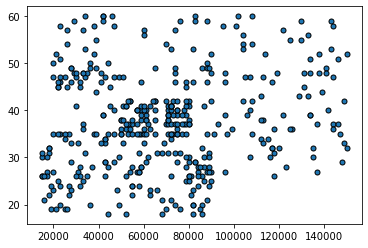

In [55]:
x = df1['Salary']
y = df1['Age']

plt.scatter(x,y, marker="o", s=25, edgecolor="k")
plt.show()

In [56]:
import seaborn as sns

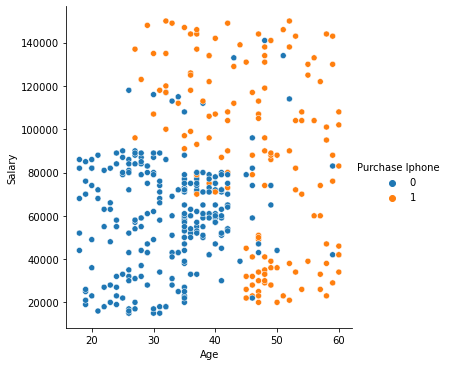

In [57]:
sns.relplot(x='Age',y='Salary',hue='Purchase Iphone',data=df)

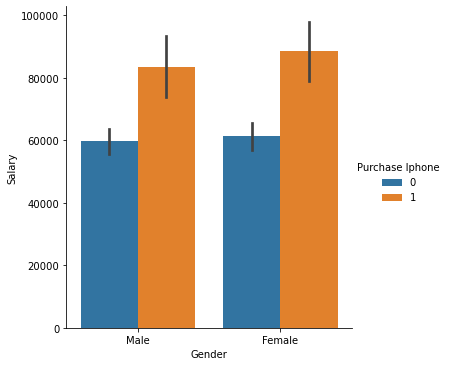

In [58]:
y=df1['Salary']
sns.catplot(x='Gender',y='Salary',hue='Purchase Iphone',kind='bar',data=df)

<function matplotlib.pyplot.show(close=None, block=None)>

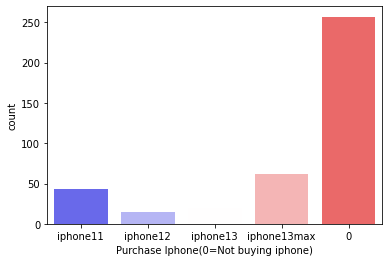

In [61]:
sns.countplot(x='Purchase Iphone',data=df1,palette='bwr')
plt.xlabel("Purchase Iphone(0=Not buying iphone)")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

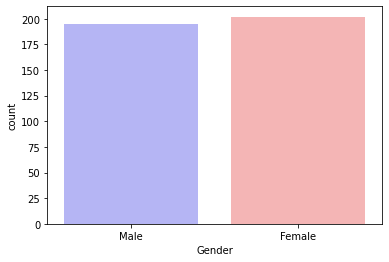

In [68]:
sns.countplot(x='Gender',data=df1,palette='bwr')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

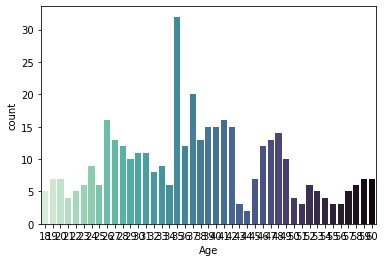

In [62]:
sns.countplot(x='Age',data=df1,palette='mako_r')

plt.show

In [176]:
old=len(df1[df1.Age>=30])
teen=len(df1[df1.Age<=29])
print('Percentage of old customers bought iphone(age>30):{:.2f}%'.format((old/(len(df1.Age))*100)))
print('Percentage of young customers bought iphone(age<30):{:.2f}%'.format((teen/(len(df1.Age))*100)))

Percentage of old customers bought iphone(age>30):74.81%
Percentage of young customers bought iphone(age<30):25.19%


In [78]:
less_sal=len(df1[df1.Salary>=30000])
high_sal=len(df1[df1.Salary<=30000])
print('Percentage of customers with high salary(more than 30k):{:.2f}%'.format((less_sal/(len(df1.Salary))*100)))
print('Percentage of customers with not so high salary(not more than 30k) :{:.2f}%'.format((high_sal/(len(df1.Salary))*100)))

Percentage of customers with high salary(more than 30k):86.65%
Percentage of customers with not so high salary(not more than 30k) :14.36%


,Gender,Age,Salary,Purchase Iphone
5,Female,47,49000,iphone11
6,Male,48,41000,iphone11
11,Female,47,30000,iphone11
12,Male,60,42000,iphone11
14,Female,52,38000,iphone11
...,...,...,...,...
392,Female,42,53000,0
393,Male,42,64000,0
394,Male,39,71000,0
395,Female,39,59000,0


In [69]:
df1

,Gender,Age,Salary,Purchase Iphone
0,Male,47,25000,iphone11
1,Male,45,26000,iphone11
2,Male,46,28000,iphone11
3,Female,48,29000,iphone11
4,Male,45,22000,iphone11
...,...,...,...,...
392,Female,42,53000,0
393,Male,42,64000,0
394,Male,39,71000,0
395,Female,39,59000,0


In [125]:
df1['Purchase Iphone'].astype(int)

0      1
1      1
2      1
3      1
4      1
      ..
392    0
393    0
394    0
395    0
396    0
Name: Purchase Iphone, Length: 397, dtype: int32

In [175]:
a=df1.loc[(df1['Age']<30)&(df1['Salary']>=30000)]
a[a['Purchase Iphone']!=0]

,Gender,Age,Salary,Purchase Iphone
58,1,27,96000,3
79,1,27,137000,4
84,0,28,123000,4
88,0,29,148000,4
142,1,26,43000,0
...,...,...,...,...
306,0,29,43000,0
307,0,19,70000,0
308,0,28,89000,0
311,1,20,36000,0


In [156]:
df1.loc[df1['Purchase Iphone']==0]

,Gender,Age,Salary,Purchase Iphone


In [144]:
df1['Purchase Iphone'].value_counts()

0    257
4     62
1     43
3     20
2     15
Name: Purchase Iphone, dtype: int64